## Libraries importation

In [86]:
import os
target_directory = 'c:/users/cl6370/appdata/roaming/python/python39/site-packages' # Change repertory
os.chdir(target_directory)

In [87]:
import sys
sys.path

['C:\\Users\\cl6370\\Desktop\\Data Analysis Python',
 'C:\\ProgramData\\Anaconda3\\python39.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\cl6370\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\cl6370\\.ipython']

In [88]:
import sys
sys.version

'3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]'

In [89]:
import os
target_directory = 'c:/users/cl6370/appdata/roaming/python/python39/site-packages'
os.chdir(target_directory)

import sys
sys.path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import seaborn as sns
from tifffile import imread
#import scanpy as sc
#import umap
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
#import leidenalg
from mpl_toolkits.mplot3d import axes3d
from scipy import stats
from scipy.spatial import distance
from scipy.interpolate import griddata
from pointpats import ripley
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import DBSCAN
from scipy.spatial import distance
from scipy.stats import poisson
from scipy.stats import norm
#from .geometry import TREE_TYPES
#%matplotlib notebook

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans

from scipy.interpolate import griddata
from scipy.stats import norm

from scipy.stats import poisson

## Read Excel file

In [118]:
data_path = 'C:/Users/cl6370/Desktop/A2000042_CD20hidimKi67hi_F2.xlsx' # Upload file with cell coordinates
data = pd.read_excel(data_path)
data.head()

,X,Y,KM_label
0,8167.7,36758.6,1
1,8285.9,36803.8,1
2,8330.0,36865.8,1
3,8336.5,36884.7,1
4,8261.0,36883.2,1


## Geographic Cell Distribution

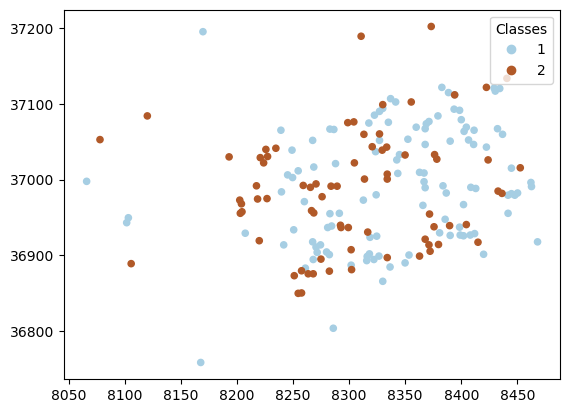

In [119]:
## Labels and color-coding within follicles

fig, ax = plt.subplots()
scatter_1 = ax.scatter(data["X"], data["Y"], 20, c = data["KM_label"], cmap = "Paired")
ax.legend(*scatter_1.legend_elements(), loc = "upper right", title = "Classes")
plt.show()

## Spatial Distribution at the Single-Cell Level

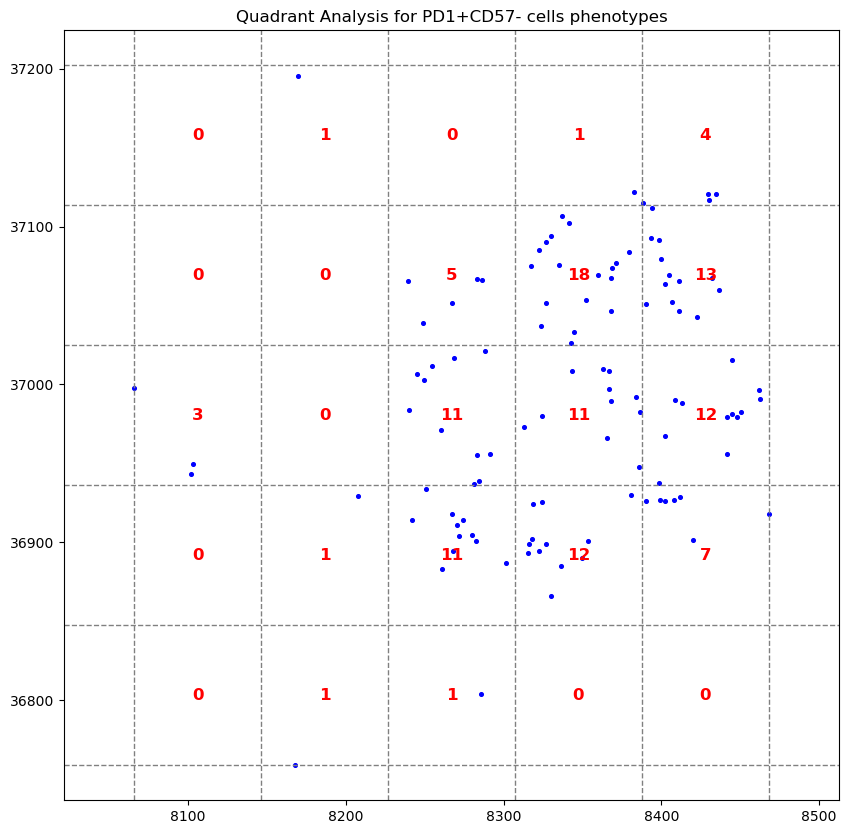

In [120]:
## QUadrant Analysis

import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
x = data['X'].values
y = data['Y'].values
km_labels = data['KM_label'].values

# Specify the KM_label you want to visualize
selected_km_label = 1 # Change this to the label you want to visualize

# Filter the data for the selected KM_label
selected_x = x[km_labels == selected_km_label]
selected_y = y[km_labels == selected_km_label]

# Define the grid size
ngridx = 5
ngridy = 5

# Calculate grid cell boundaries
xi = np.linspace(np.min(x), np.max(x), ngridx + 1)
yi = np.linspace(np.min(y), np.max(y), ngridy + 1)

# Create an empty grid to store cell counts
grid_counts = np.zeros((ngridx, ngridy), dtype=int)

# Count cells in each grid cell
for i in range(ngridx):
    for j in range(ngridy):
        mask = (xi[i] <= selected_x) & (selected_x <= xi[i + 1]) & (yi[j] <= selected_y) & (selected_y <= yi[j + 1])
        grid_counts[i, j] = np.sum(mask)

# Create the scatter plot for data points
fig, ax = plt.subplots(figsize=(10, 10))

# Scatter plot for data points (blue dots)
ax.scatter(selected_x, selected_y, s=7, c='blue')

ax.set_title(f'Quadrant Analysis for PD1+CD57- cells phenotypes')

for i in range(ngridx + 1):
    plt.axvline(xi[i], color='gray', linestyle='--', lw=1)

for j in range(ngridy + 1):
    plt.axhline(yi[j], color='gray', linestyle='--', lw=1)

# Add the number of cells (dots) per grid cell in red and bold
for i in range(ngridx):
    for j in range(ngridy):
        plt.text((xi[i] + xi[i + 1]) / 2, (yi[j] + yi[j + 1]) / 2, str(grid_counts[i, j]),
                 color='red', ha='center', va='center', fontsize=12, weight='bold')

plt.axis('equal')
plt.show()

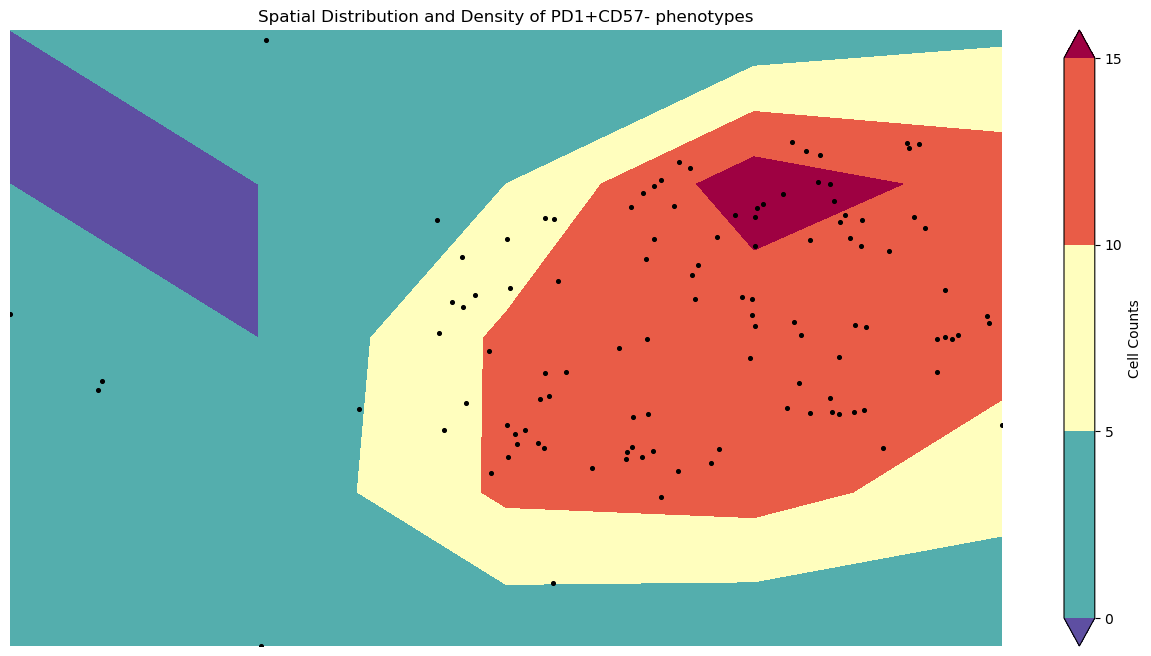

In [121]:
# Sample data (replace with your actual data)
x = data['X'].values
y = data['Y'].values
km_labels = data['KM_label'].values

# Specify the KM_label you want to visualize
selected_km_label = 1  # Change this to the label you want to visualize

# Filter the data for the selected KM_label
selected_x = x[km_labels == selected_km_label]
selected_y = y[km_labels == selected_km_label]

# Define the grid size
ngridx = 5
ngridy = 5

# Calculate grid cell boundaries
xi = np.linspace(np.min(x), np.max(x), ngridx + 1)
yi = np.linspace(np.min(y), np.max(y), ngridy + 1)

# Create an empty grid to store cell counts
grid_counts = np.zeros((ngridx, ngridy), dtype=int)

# Count cells in each grid cell
for i in range(ngridx):
    for j in range(ngridy):
        mask = (xi[i] <= selected_x) & (selected_x <= xi[i + 1]) & (yi[j] <= selected_y) & (selected_y <= yi[j + 1])
        grid_counts[i, j] = np.sum(mask)

# Create the contour plot with reversed colormap
fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))
xi = np.linspace(np.min(x), np.max(x), ngridx)
yi = np.linspace(np.min(y), np.max(y), ngridy)

zi = grid_counts.T  # Transpose to match grid cell layout

# Define contour levels
levels = np.arange(0, zi.max() + 1, 5)

# Create the contour plot with grid cell counts using 'Spectral_r' colormap
cntr1 = ax1.contourf(xi, yi, zi, levels, cmap="Spectral_r", extend="both")
cbar = plt.colorbar(cntr1)
cbar.set_label("Cell Counts")

# Scatter plot for data points (selected KM_label)
ax1.scatter(selected_x, selected_y, s=7, c='k')

ax1.set_title(f'Spatial Distribution and Density of PD1+CD57- phenotypes')
plt.axis('off')

ax1.grid(True, which='both', linestyle='--', lw=0.5, color='black')

plt.show()

## Distance Matrix

In [125]:
# Tfh (PD1+CD57+ and PD1+CD57-) 
pd1 = data.loc[data['KM_label']==2]
pd1.head()

,X,Y,KM_label
112,8254.6,36849.9,2
113,8257.6,36850.4,2
114,8251.1,36873.2,2
115,8268.0,36875.7,2
116,8263.5,36875.7,2


In [126]:
# GC B cells CD20+Ki67+Bcl6+
bc = data.loc[data["KM_label"]==1] 
bc.head()

,X,Y,KM_label
0,8167.7,36758.6,1
1,8285.9,36803.8,1
2,8330.0,36865.8,1
3,8336.5,36884.7,1
4,8261.0,36883.2,1


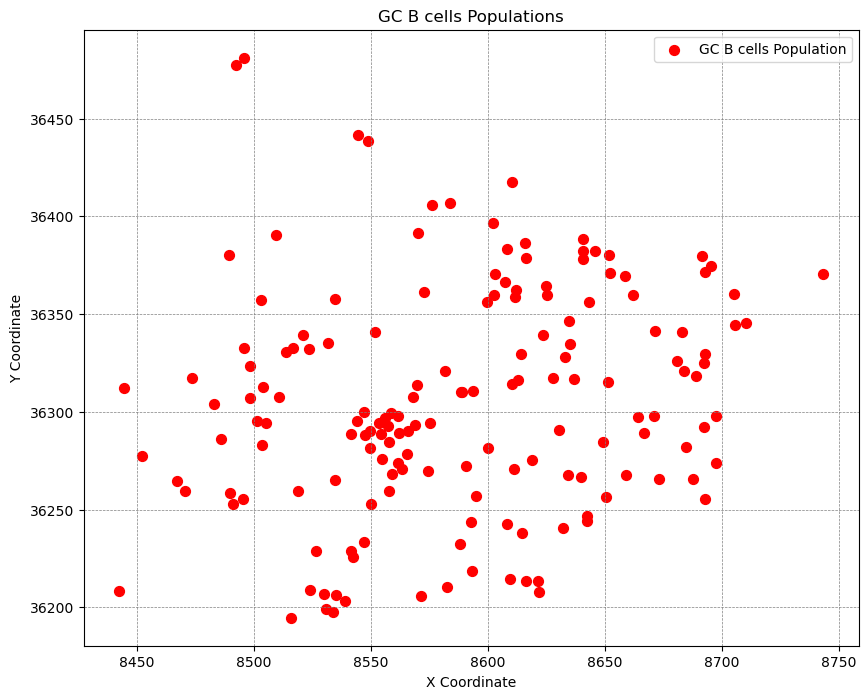

In [98]:
# Create a scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot for 'bc' population (red dots)
plt.scatter(bc['X'], bc['Y'], c='red', label='GC B cells Population', s=50)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('GC B cells Populations')
plt.legend()
plt.grid(True, linestyle='--', lw=0.5, color='gray')

plt.show()

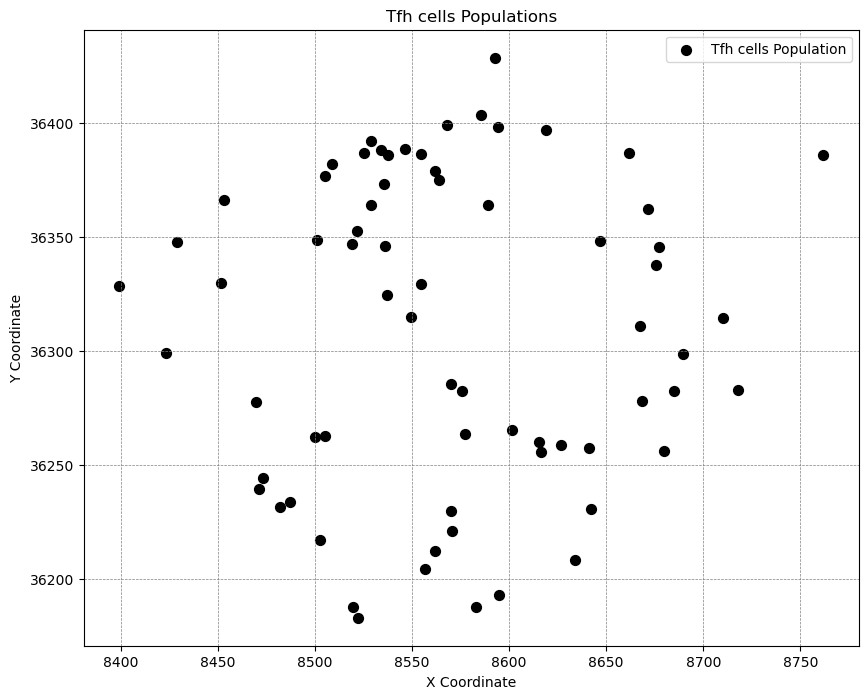

In [99]:
# Create a scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot for 'bc' population (red dots)
plt.scatter(pd1['X'], pd1['Y'], c='black', label='Tfh cells Population', s=50)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Tfh cells Populations')
plt.legend()
plt.grid(True, linestyle='--', lw=0.5, color='gray')

plt.show()

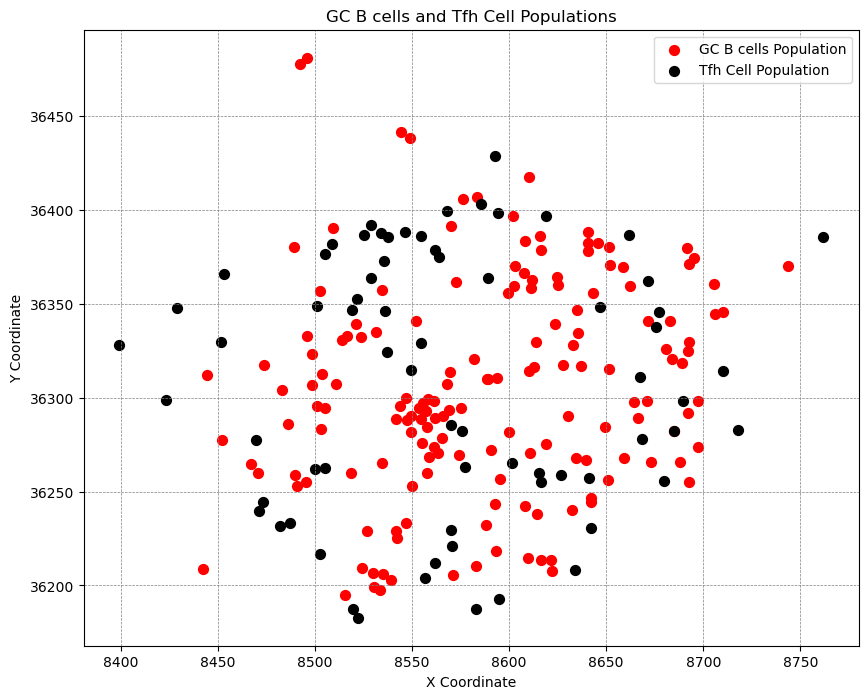

In [100]:
plt.figure(figsize=(10, 8))

# Scatter plot for 'bc' population (red dots)
plt.scatter(bc['X'], bc['Y'], c='red', label='GC B cells Population', s=50)

# Scatter plot for 'pd1' population (dark dots)
plt.scatter(pd1['X'], pd1['Y'], c='black', label='Tfh Cell Population', s=50)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('GC B cells and Tfh Cell Populations')
plt.legend()
plt.grid(True, linestyle='--', lw=0.5, color='gray')

plt.show()

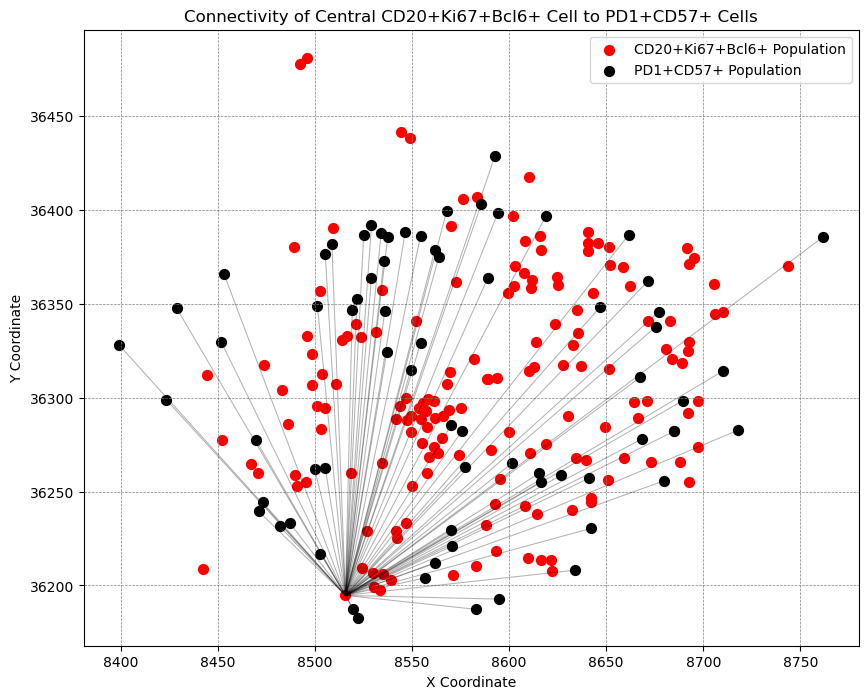

In [101]:
# Calculate the most central cell in the 'bc' population
central_bc = bc.iloc[np.argmin(np.sum(distance.cdist(bc[['X', 'Y']], [bc[['X', 'Y']].mean().values], 'euclidean')))]

plt.figure(figsize=(10, 8))

# Scatter plot for 'bc' population (red dots)
plt.scatter(bc['X'], bc['Y'], c='red', label='CD20+Ki67+Bcl6+ Population', s=50)

# Scatter plot for 'pd1' population (dark dots)
plt.scatter(pd1['X'], pd1['Y'], c='black', label='PD1+CD57+ Population', s=50)

# Draw lines connecting the central 'bc' cell to each 'pd1' cell based on Euclidean distance
for i in range(len(pd1)):
    x_values = [central_bc['X'], pd1.iloc[i]['X']]
    y_values = [central_bc['Y'], pd1.iloc[i]['Y']]
    plt.plot(x_values, y_values, 'k-', lw=0.75, alpha=0.3)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Connectivity of Central CD20+Ki67+Bcl6+ Cell to PD1+CD57+ Cells')
plt.legend()
plt.grid(True, linestyle='--', lw=0.5, color='gray')

plt.show()

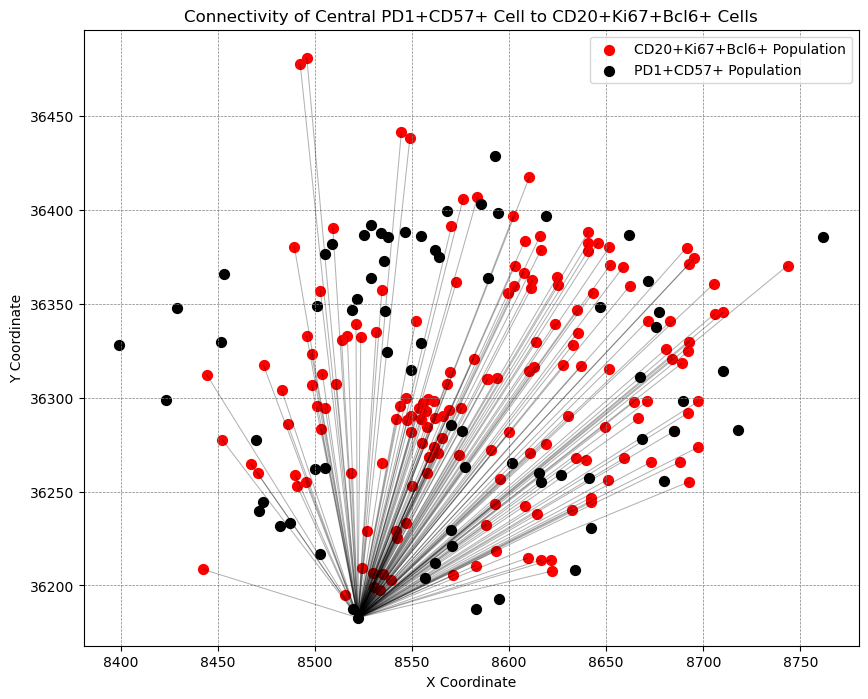

In [102]:
# Calculate the most central cell in the 'bc' population
central_pd1 = pd1.iloc[np.argmin(np.sum(distance.cdist(pd1[['X', 'Y']], [bc[['X', 'Y']].mean().values], 'euclidean')))]

plt.figure(figsize=(10, 8))

# Scatter plot for 'bc' population (red dots)
plt.scatter(bc['X'], bc['Y'], c='red', label='CD20+Ki67+Bcl6+ Population', s=50)

# Scatter plot for 'pd1' population (dark dots)
plt.scatter(pd1['X'], pd1['Y'], c='black', label='PD1+CD57+ Population', s=50)

# Draw lines connecting the central 'bc' cell to each 'pd1' cell based on Euclidean distance
for i in range(len(bc)):
    x_values = [central_pd1['X'], bc.iloc[i]['X']]
    y_values = [central_pd1['Y'], bc.iloc[i]['Y']]
    plt.plot(x_values, y_values, 'k-', lw=0.75, alpha=0.3)
    
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Connectivity of Central PD1+CD57+ Cell to CD20+Ki67+Bcl6+ Cells')
plt.legend()
plt.grid(True, linestyle='--', lw=0.5, color='gray')

plt.show()

In [127]:
distance_frompd1=distance.cdist(pd1[['X', 'Y']].values, bc[['X', 'Y']].values, 'euclidean')

distance_frompd1_min=[np.min(x) for x in distance_frompd1] # If calculating the minimum euclidean distance
#distance_frompd1_mean=[np.mean(x) for x in distance_frompd1] # If calculating the mean euclidean distance

distance_frombc=distance.cdist(bc[['X', 'Y']].values, pd1[['X', 'Y']].values, 'euclidean')

distance_frombc_min=[np.min(x) for x in distance_frombc] # If calculating the minimum euclidean distance
#distance_frombc_mean=[np.mean(x) for x in distance_frombc] # If calculating the mean euclidean distance

In [128]:
#Print list of distance

#distance_frompd1_min
#distance_frompd1_mean

distance_frombc_min
#distance_frombc_mean

[126.0448332935572,
 54.520179750252325,
 31.554555930954358,
 12.649505919206334,
 4.879549159502087,
 5.913543776790558,
 15.729272074701697,
 6.918092222570828,
 17.996110690925267,
 12.159769734661563,
 7.6655071586943695,
 9.503683496413233,
 16.843396332095768,
 9.542536350468735,
 16.637908522407578,
 10.647065323366217,
 9.52732911156235,
 16.497575579461458,
 22.483104767803926,
 18.804254837671955,
 23.970815588964165,
 7.184010022266121,
 9.651942809611738,
 15.945532289642413,
 28.595454184184455,
 11.788129622632749,
 7.963039620647021,
 54.24767276114103,
 60.65154573462925,
 14.434680460612542,
 15.831613941726284,
 13.511846653956297,
 27.817979797249148,
 23.03584163863161,
 15.672268502040904,
 56.370382294249445,
 14.085808461001813,
 19.657568516986792,
 19.817668884100154,
 9.453041838476818,
 23.236178687557373,
 16.82973558913023,
 22.38950647066177,
 9.849365461794715,
 5.024937810560445,
 6.229767250868664,
 14.615402833996384,
 8.5,
 34.40930106817025,
 20.949

In [129]:
from_Bcells_matrix=distance.cdist(bc[['X', 'Y']].values, pd1[['X', 'Y']].values, 'euclidean')

from_Bcells_min_vec=[min(x) for x in from_Bcells_matrix]
print(len(from_Bcells_min_vec))
print(len(bc))

112
112


In [130]:
from_Bcells_matrix

array([[126.04483329, 128.48832632, 141.73468171, ..., 443.68793087,
        464.00866371, 488.97846578],
       [ 55.72162955,  54.52017975,  77.6363317 , ..., 346.15005417,
        364.50382714, 407.95041365],
       [ 77.05822474,  74.0197271 ,  79.24626174, ..., 272.25901271,
        289.96291142, 339.26168366],
       ...,
       [300.65530097, 298.93521037, 281.37208461, ...,  39.7       ,
         59.208192  ,  80.95931077],
       [324.74965743, 322.68078654, 307.68503376, ...,  11.99416525,
         14.84991582, 102.18033079],
       [322.42997689, 320.39216595, 305.1401809 , ...,   6.97208721,
         17.21540008,  98.85934453]])

In [131]:
from_Bcells_min_vec

[126.0448332935572,
 54.520179750252325,
 31.554555930954358,
 12.649505919206334,
 4.879549159502087,
 5.913543776790558,
 15.729272074701697,
 6.918092222570828,
 17.996110690925267,
 12.159769734661563,
 7.6655071586943695,
 9.503683496413233,
 16.843396332095768,
 9.542536350468735,
 16.637908522407578,
 10.647065323366217,
 9.52732911156235,
 16.497575579461458,
 22.483104767803926,
 18.804254837671955,
 23.970815588964165,
 7.184010022266121,
 9.651942809611738,
 15.945532289642413,
 28.595454184184455,
 11.788129622632749,
 7.963039620647021,
 54.24767276114103,
 60.65154573462925,
 14.434680460612542,
 15.831613941726284,
 13.511846653956297,
 27.817979797249148,
 23.03584163863161,
 15.672268502040904,
 56.370382294249445,
 14.085808461001813,
 19.657568516986792,
 19.817668884100154,
 9.453041838476818,
 23.236178687557373,
 16.82973558913023,
 22.38950647066177,
 9.849365461794715,
 5.024937810560445,
 6.229767250868664,
 14.615402833996384,
 8.5,
 34.40930106817025,
 20.949

## Nearest-neighbor radius

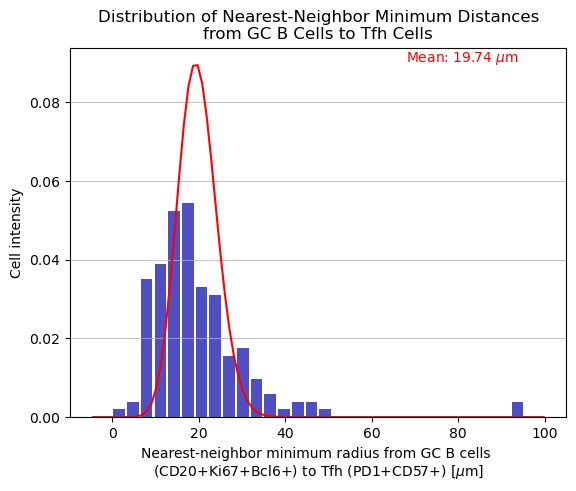

In [108]:
num_bins = 30

# Fit a Poisson curve to the data. Generation of a Pooisson distribution curve 

lambda_param = np.mean(distance_frombc_min)  # Calculate the mean for Poisson distribution parameter

n, bins, patches = plt.hist(x=distance_frombc_min, bins=num_bins, color='#0504aa',
                            alpha=0.7, rwidth=0.85, density=True)  # Use density=True to create a PDF

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = poisson.pmf(x, lambda_param)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Nearest-neighbor minimum radius from GC B cells \n(CD20+Ki67+Bcl6+) to Tfh (PD1+CD57+) [$\mu$m]')
plt.ylabel('Cell intensity')
plt.title('Distribution of Nearest-Neighbor Minimum Distances\nfrom GC B Cells to Tfh Cells')

plt.plot(x, p, 'r', linewidth=1.5)

plt.figtext(0.65, 0.85, f"Mean: {lambda_param:.2f} $\mu$m", color='red')

plt.show()

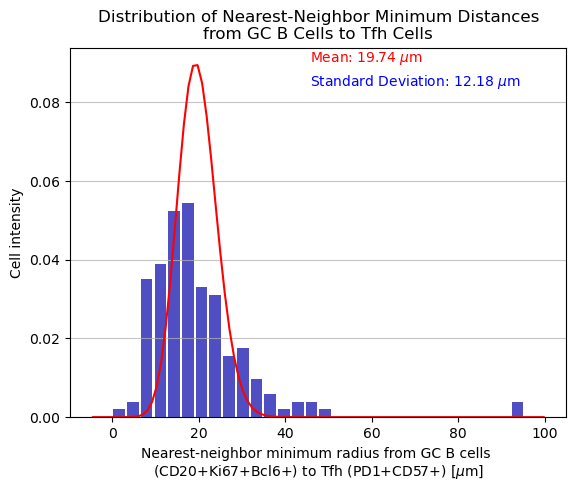

In [109]:
num_bins = 30

# Fit a Poisson curve to the data
n, bins, patches = plt.hist(x=distance_frombc_min, bins=num_bins, color='#0504aa',
                            alpha=0.7, rwidth=0.85, density=True)  # Use density=True to create a PDF

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = poisson.pmf(x, lambda_param)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Nearest-neighbor minimum radius from GC B cells \n(CD20+Ki67+Bcl6+) to Tfh (PD1+CD57+) [$\mu$m]')
plt.ylabel('Cell intensity')
plt.title('Distribution of Nearest-Neighbor Minimum Distances\nfrom GC B Cells to Tfh Cells')

# Add the Poisson PDF curve (thin red line)
plt.plot(x, p, 'r', linewidth=1.5)

plt.figtext(0.5, 0.85, f"Mean: {lambda_param:.2f} $\mu$m", color='red')

# Calculate standard deviation
std_dev = np.sqrt(np.mean((distance_frombc_min - lambda_param) ** 2))

plt.figtext(0.5, 0.80, f"Standard Deviation: {std_dev:.2f} $\mu$m", color='blue')

plt.show()

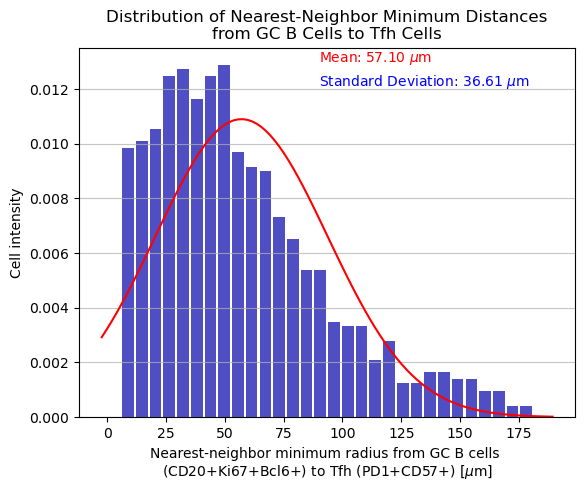

In [30]:
# Calculate mean and standard deviation from the data
mean_value = np.mean(distance_frombc_min)
std_dev = np.std(distance_frombc_min)

num_bins = 30

# Fit a Gaussian curve to the data
n, bins, patches = plt.hist(x=distance_frombc_min, bins=num_bins, color='#0504aa',
                            alpha=0.7, rwidth=0.85, density=True)  # Use density=True to create a PDF

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_value, std_dev)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Nearest-neighbor minimum radius from GC B cells \n(CD20+Ki67+Bcl6+) to Tfh (PD1+CD57+) [$\mu$m]')
plt.ylabel('Cell intensity')
plt.title('Distribution of Nearest-Neighbor Minimum Distances\nfrom GC B Cells to Tfh Cells')

# Add the Gaussian PDF curve (thin red line)
plt.plot(x, p, 'r', linewidth=1.5)

plt.figtext(0.5, 0.85, f"Mean: {mean_value:.2f} $\mu$m", color='red')
plt.figtext(0.5, 0.80, f"Standard Deviation: {std_dev:.2f} $\mu$m", color='blue')

plt.show()

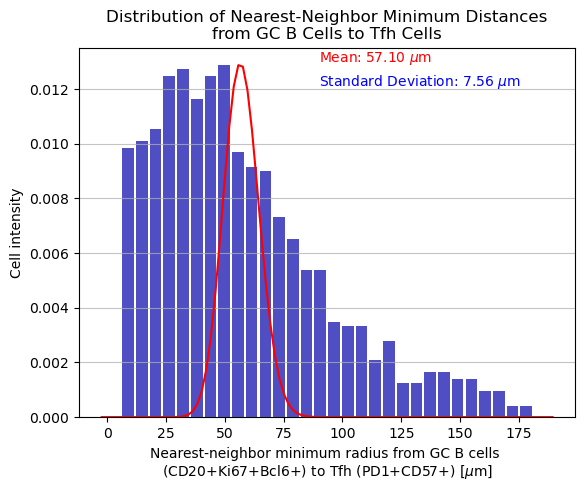

In [40]:
# Calculate mean and standard deviation from the data
mean_value = np.mean(distance_frombc_min)
std_dev = np.sqrt(mean_value)  # Calculate standard deviation for Poisson distribution

mean_value = np.mean(distance_frombc_min)
std_dev = np.std(distance_frombc_min)

num_bins = 30

# Fit a Poisson curve to the data
n, bins, patches = plt.hist(x=distance_frombc_min, bins=num_bins, color='#0504aa',
                            alpha=0.7, rwidth=0.85, density=True)  # Use density=True to create a PDF

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = poisson.pmf(x, lambda_param)

scaling_factor = np.max(n) / np.max(p)
p_scaled = p * scaling_factor

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Nearest-neighbor minimum radius from GC B cells \n(CD20+Ki67+Bcl6+) to Tfh (PD1+CD57+) [$\mu$m]')
plt.ylabel('Cell intensity')
plt.title('Distribution of Nearest-Neighbor Minimum Distances\nfrom GC B Cells to Tfh Cells')

# Add the scaled Poisson PDF curve (thin red line)
plt.plot(x, p_scaled, 'r', linewidth=1.5)


plt.figtext(0.5, 0.85, f"Mean: {mean_value:.2f} $\mu$m", color='red')
plt.figtext(0.5, 0.80, f"Standard Deviation: {std_dev:.2f} $\mu$m", color='blue')

plt.show()

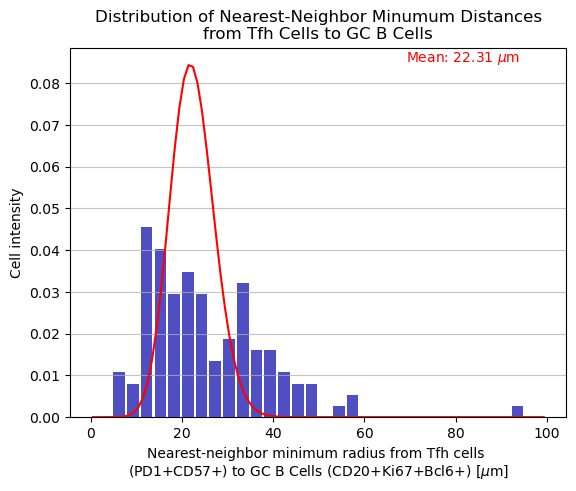

In [19]:
num_bins = 30

# Fit a Poisson curve to the data
lambda_param = np.mean(distance_frombc_min)  # Calculate the mean for Poisson distribution parameter


n, bins, patches = plt.hist(x=distance_frompd1_min, bins=num_bins, color='#0504aa',
                            alpha=0.7, rwidth=0.85, density=True)  # Use density=True to create a PDF

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = poisson.pmf(x, lambda_param)

plt.grid(axis='y', alpha=0.75)

plt.xlabel('Nearest-neighbor minimum radius from Tfh cells \n(PD1+CD57+) to GC B Cells (CD20+Ki67+Bcl6+) [$\mu$m]')
plt.ylabel('Cell intensity')
plt.title('Distribution of Nearest-Neighbor Minumum Distances\nfrom Tfh Cells to GC B Cells')

plt.plot(x, p, 'r', linewidth=1.5)

plt.figtext(0.65, 0.85, f"Mean: {lambda_param:.2f} $\mu$m", color='red')

plt.show()

## Empirical cross-G-function plotted against the theoritical expectation or Poisson curve

Use a Python library or module named "ripley" to perform a G-test (also known as the quadrat test) on a set of spatial point data. Here's a breakdown of what this code is doing:

points = pd1[['X', 'Y']].values:

This line extracts the columns 'X' and 'Y' from the DataFrame pd1 and selects the values in those columns. The result is a NumPy array containing the X and Y coordinates of spatial points.
ripley.g_test(points, support=10, keep_simulations=True):

USe a function or method named g_test from the "ripley" library or module.
points is the spatial point data for which you want to perform the G-test.
support=10 specifies the support or distance up to which the test will be performed. This defines the distance range for analyzing point patterns.
keep_simulations=True indicates that you want to keep the simulation results. G-tests often involve generating simulated point patterns to compare with the observed pattern.
The G-test, or quadrat test, is a statistical test used in spatial analysis to determine whether a set of points is distributed randomly or exhibits clustering or dispersion. It does this by comparing the observed pattern of points to simulated patterns generated under a random distribution assumption. The support parameter defines the range of distances for which the test is conducted, and the results can help you understand the spatial distribution characteristics of the points.

The specific interpretation and use of the results depend on the details of the "ripley" library and the context of your analysis. The test results can indicate whether the points are significantly clustered, dispersed, or randomly distributed within the specified range, providing valuable insights for spatial analysis and pattern recognition.

## G-Function GC B cells

In [132]:
points_bc = bc[['X', 'Y']].values
g_test_bc = ripley.g_test(points_bc, support=10, keep_simulations=True)

In [133]:
g_test_bc.pvalue

array([0.00e+00, 1.00e-04, 2.90e-03, 5.24e-02, 1.00e-04, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00])

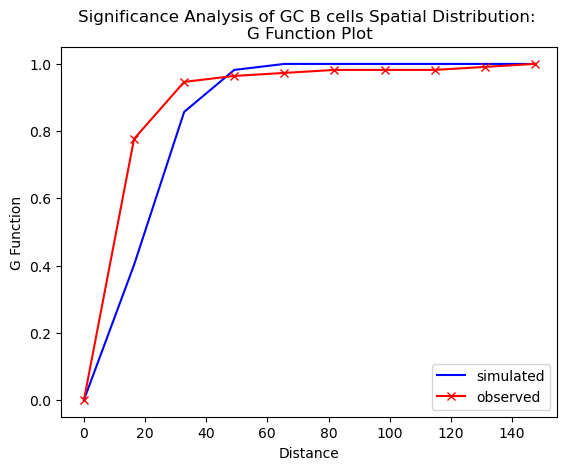

In [134]:
fig, ax = plt.subplots()
plt.plot(g_test_bc.support, np.median(g_test_bc.simulations, axis=0), 
         color='blue', label='simulated')
plt.plot(g_test_bc.support, g_test_bc.statistic, 
         marker='x', color='red', label='observed')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('G Function')
plt.title('Significance Analysis of GC B cells Spatial Distribution: \nG Function Plot')
plt.show()

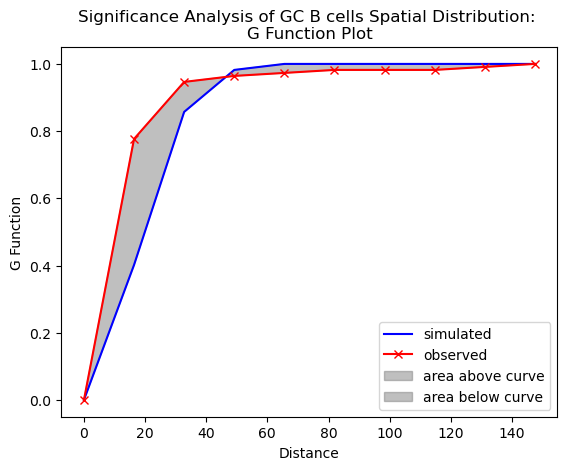

Area above curve: 7.609128732848827
Area below curve: 1.7559527845035763
Total area between curves: 9.365081517352403


In [135]:
# Calculate the absolute difference between simulated and observed curves
difference_above = np.maximum(0, g_test_bc.statistic - np.median(g_test_bc.simulations, axis=0))
difference_below = np.maximum(0, np.median(g_test_bc.simulations, axis=0) - g_test_bc.statistic)

# Calculate the areas using the trapezoidal rule
#The np.trapz function is then used to compute the area under the curve defined by the differences 
#between the data points and the support values
area_above = np.trapz(difference_above, g_test_bc.support)
area_below = np.trapz(difference_below, g_test_bc.support)

# Plot the curves
fig, ax = plt.subplots()
plt.plot(np.squeeze(g_test_bc.support), np.median(g_test_bc.simulations, axis=0), 
         color='blue', label='simulated')
plt.plot(np.squeeze(g_test_bc.support), g_test_bc.statistic, 
         marker='x', color='red', label='observed')

# Create shaded regions between the curves
ax.fill_between(np.squeeze(g_test_bc.support), 
                np.median(g_test_bc.simulations, axis=0), g_test_bc.statistic, 
                where=(g_test_bc.statistic >= np.median(g_test_bc.simulations, axis=0)),
                interpolate=True, color='gray', alpha=0.5, label='area above curve')

ax.fill_between(np.squeeze(g_test_bc.support), 
                np.median(g_test_bc.simulations, axis=0), g_test_bc.statistic, 
                where=(g_test_bc.statistic <= np.median(g_test_bc.simulations, axis=0)),
                interpolate=True, color='gray', alpha=0.5, label='area below curve')

plt.legend()
plt.xlabel('Distance')
plt.ylabel('G Function')
plt.title('Significance Analysis of GC B cells Spatial Distribution: \nG Function Plot')
plt.show()

print("Area above curve:", area_above)
print("Area below curve:", area_below)
print("Total area between curves:", area_above + area_below)

## G-Function Tfh cells (PD1+CD57+)

In [136]:
points_pd1 = pd1[['X', 'Y']].values
g_test_pd1 = ripley.g_test(points_pd1, support=10, keep_simulations=True)

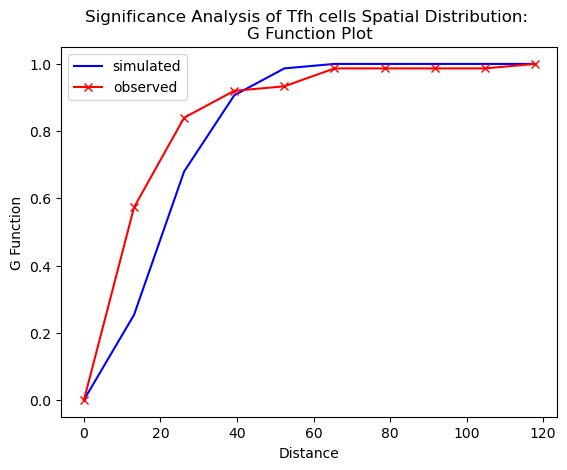

In [137]:
points_pd1 = pd1[['X', 'Y']].values
g_test_pd1 = ripley.g_test(points_pd1, support=10, keep_simulations=True)

fig, ax = plt.subplots()
plt.plot(g_test_pd1.support, np.median(g_test_pd1.simulations, axis=0), 
         color='blue', label='simulated')
plt.plot(g_test_pd1.support, g_test_pd1.statistic, 
         marker='x', color='red', label='observed')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('G Function')
plt.title('Significance Analysis of Tfh cells Spatial Distribution: \nG Function Plot')
plt.show()

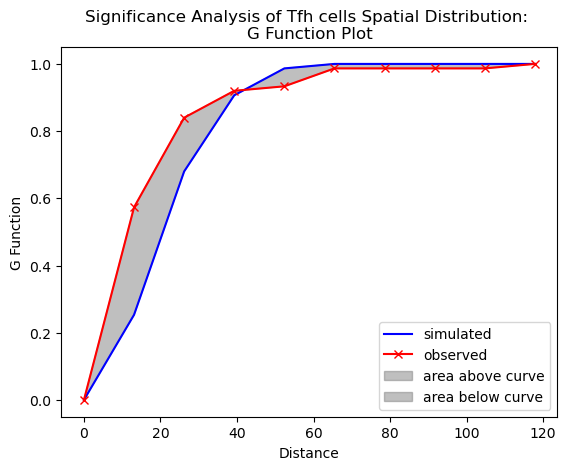

Area above curve: 6.460139297847962
Area below curve: 1.396786875210369
Total area between curves: 7.856926173058331


In [138]:
# Calculate the absolute difference between simulated and observed curves
difference_above = np.maximum(0, g_test_pd1.statistic - np.median(g_test_pd1.simulations, axis=0))
difference_below = np.maximum(0, np.median(g_test_pd1.simulations, axis=0) - g_test_pd1.statistic)

# Calculate the areas using the trapezoidal rule
area_above = np.trapz(difference_above, g_test_pd1.support)
area_below = np.trapz(difference_below, g_test_pd1.support)

# Plot the curves
fig, ax = plt.subplots()
plt.plot(np.squeeze(g_test_pd1.support), np.median(g_test_pd1.simulations, axis=0), 
         color='blue', label='simulated')
plt.plot(np.squeeze(g_test_pd1.support), g_test_pd1.statistic, 
         marker='x', color='red', label='observed')

# Create shaded regions between the curves
ax.fill_between(np.squeeze(g_test_pd1.support), 
                np.median(g_test_pd1.simulations, axis=0), g_test_pd1.statistic, 
                where=(g_test_pd1.statistic >= np.median(g_test_pd1.simulations, axis=0)),
                interpolate=True, color='gray', alpha=0.5, label='area above curve')

ax.fill_between(np.squeeze(g_test_pd1.support), 
                np.median(g_test_pd1.simulations, axis=0), g_test_pd1.statistic, 
                where=(g_test_pd1.statistic <= np.median(g_test_pd1.simulations, axis=0)),
                interpolate=True, color='gray', alpha=0.5, label='area below curve')

plt.legend()
plt.xlabel('Distance')
plt.ylabel('G Function')
plt.title('Significance Analysis of Tfh cells Spatial Distribution: \nG Function Plot')
plt.show()

# Print the calculated areas
print("Area above curve:", area_above)
print("Area below curve:", area_below)
print("Total area between curves:", area_above + area_below)

In [2]:
import numpy as np
import pandas as pd

# Set the seed for reproducibility
np.random.seed(42)

# Create a dummy dataset
num_cells = 100
X_coordinates = np.random.uniform(0, 100, num_cells)
Y_coordinates = np.random.uniform(0, 100, num_cells)
KM_labels = np.random.choice([1, 2], num_cells)

# Combine into a DataFrame
data = pd.DataFrame({
    'X': X_coordinates,
    'Y': Y_coordinates,
    'KM_label': KM_labels
})

# Display the first few rows of the dataset
print(data.head())

           X          Y  KM_label
0  37.454012   3.142919         2
1  95.071431  63.641041         2
2  73.199394  31.435598         1
3  59.865848  50.857069         1
4  15.601864  90.756647         2


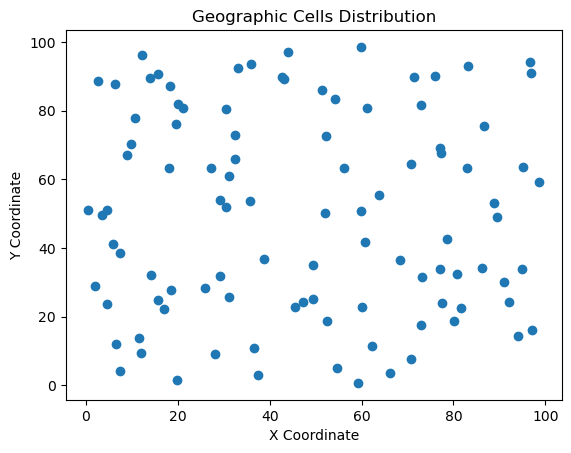

In [3]:
import matplotlib.pyplot as plt

# Example of plotting the cells
plt.scatter(data['X'], data['Y'])
plt.title('Geographic Cells Distribution')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()